# TASK 1 PREDICTION USING SUPERVISED ML
### AUTHOR ASHWATHY PILLAI
#### To Predict the percentage of marks of the students based on the number of hours they studied.

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [33]:
# Reading the Data set 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
# To Check if there is any null value in the Dataset
data.isnull == True

False

#### since the output is false, that means there is no null value and hence we can visualize our model.

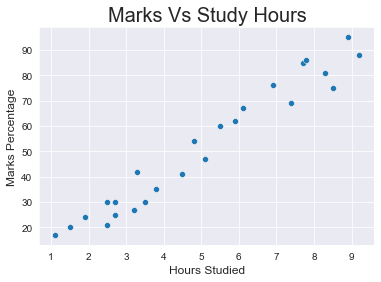

In [35]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### The above scatter plot shows that there seems to be a correlation between the 'Marks Percentage' and the 'Hours Studied',so we will plot a regression line to confirm the correlation.

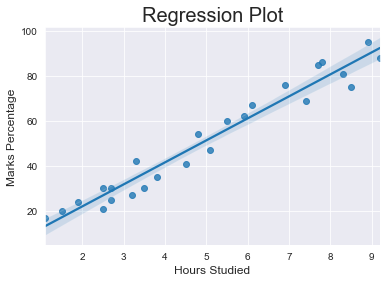

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [36]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#### Variables are positively correlated

## Training the model
### 1) Splitting the Data Values

In [37]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model.

In [45]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("~~~Model is Trained~~~")

~~~Model is Trained~~~


## Predicting the Percentage of Marks

In [39]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing the Predicted Marks with the Actual Marks

In [40]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visually Comparing the Predicted Marks with the Actual Marks

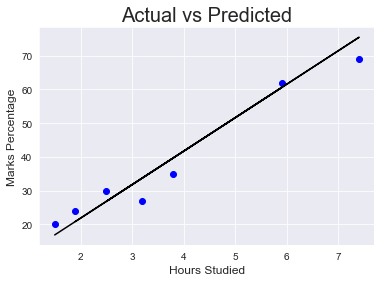

In [41]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Calculating the mean absolute error

In [42]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


##### Small value of Mean absolute error indicates that the chances of error of the model is very less.

### The score prediction of a student if he/she studies for 9.25 hrs/ day-

In [43]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))


Score = 93.893


### So according to the regression model, if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.